## 逻辑回归

http://blog.csdn.net/han_xiaoyang/article/details/49123419
逻辑回归。它始于输出结果为有实际意义的连续值的线性回归，但是线性回归对于分类的问题没有办法准确而又具备鲁棒性地分割，因此我们设计出了逻辑回归这样一个算法，它的输出结果表征了某个样本属于某类别的概率。
    逻辑回归的成功之处在于，将原本输出结果范围可以非常大的θTX 通过sigmoid函数映射到(0,1)，从而完成概率的估测。
而直观地在二维空间理解逻辑回归，是sigmoid函数的特性，使得判定的阈值能够映射为平面的一条判定边界，当然随着特征的复杂化，判定边界可能是多种多样的样貌，但是它能够较好地把两类样本点分隔开，解决分类问题。
    求解逻辑回归参数的传统方法是梯度下降，构造为凸函数的代价函数后，每次沿着偏导方向(下降速度最快方向)迈进一小部分，直至N次迭代后到达最低点。

利用Scikit-Learn对这个数据进行逻辑回归分析。 首先进行特征筛选， 特征筛选的方法有很多， 主要包含在Scikit_Learn的feature_selection库中， 比较简单的有通过F检验（f_regression） 来给出
各个特征的F值和p值， 从而可以筛选变量（选择F值大的或者p值小的特征） 。 其次有递归特征消除（Recursive Feature Elimination， RFE） 和稳定性选择（Stability Selection） 等比较新的方法。 这
里使用了稳定性选择方法中的随机逻辑回归进行特征筛选， 然后利用筛选后的特征建立逻辑回归模型， 输出平均正确率。

In [ ]:
递归特征消除的主要思想是反复的构建模型（如SVM或者回归模型） 然后选出最好的（或者最差的） 的特征（可以根据系数来选） ， 把选出来的特征放到一边， 然后在剩余的特征上重复
这个过程， 直到遍历所有特征。 这个过程中特征被消除的次序就是特征的排序。 因此， 这是一种寻找最优特征子集的贪心算法。 Scikit-Learn提供了RFE包， 可以用于特征消除， 还提供了
RFECV， 可以通过交叉验证来对特征进行排序。

In [21]:
import pandas as pd
input_file='E://learnFile//chapter5//demo//data/bankloan.xls'
data=pd.read_excel(input_file)
data.head()

,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [22]:
X=data.iloc[:,:8].as_matrix()#将矩阵转换为Numpy数组

In [23]:
Y=data.iloc[:,8].as_matrix()

In [35]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import RandomizedLogisticRegression as RLR
rlr=RLR()#建立随机逻辑回归模型，筛选变量
rlr.fit(X,Y) #训练模型
rlr.get_support()#获取特征筛选结果，也可以通过.scores_方法获取各个特征的分数
x=data.iloc[:,0:8]
X = x[x.columns[rlr.get_support()]].as_matrix() #筛选好特征
x.clo

In [40]:
lr=LR()#建立逻辑回归模型
lr.fit(X,Y)
print("正确率：%s" % lr.score(X,Y))

正确率：0.814285714286


In [41]:
x.columns[rlr.get_support()]

Index(['工龄', '地址', '负债率', '信用卡负债'], dtype='object')

## 决策树

https://www.cnblogs.com/leoo2sk/archive/2010/09/19/decision-tree.html
决策树（decision tree）是一个树结构（可以是二叉树或非二叉树）。其每个非叶节点表示一个特征属性上的测试，每个分支代表这个特征属性在某个值域上的输出，而每个叶节点存放一个类别。使用决策树进行决策的过程就是从根节点开始，测试待分类项中相应的特征属性，并按照其值选择输出分支，直到到达叶子节点，将叶子节点存放的类别作为决策结果。

使用属性选择度量来选择将元组最好地划分成不同的类的属性。所谓决策树的构造就是进行属性选择度量确定各个特征属性之间的拓扑结构。

      构造决策树的关键步骤是分裂属性。所谓分裂属性就是在某个节点处按照某一特征属性的不同划分构造不同的分支，其目标是让各个分裂子集尽可能地“纯”。尽可能“纯”就是尽量让一个分裂子集中待分类项属于同一类别。分裂属性分为三种不同的情况：

      1、属性是离散值且不要求生成二叉决策树。此时用属性的每一个划分作为一个分支。

      2、属性是离散值且要求生成二叉决策树。此时使用属性划分的一个子集进行测试，按照“属于此子集”和“不属于此子集”分成两个分支。

      3、属性是连续值。此时确定一个值作为分裂点split_point，按照>split_point和<=split_point生成两个分支。

      构造决策树的关键性内容是进行属性选择度量，属性选择度量是一种选择分裂准则，是将给定的类标记的训练集合的数据划分D“最好”地分成个体类的启发式方法，它决定了拓扑结构及分裂点split_point的选择。

      属性选择度量算法有很多，一般使用自顶向下递归分治法，并采用不回溯的贪心策略

In [87]:
import pandas as pd
input_file='E://learnFile//chapter5//demo//data/sales_data.xls'
data=pd.read_excel(input_file,index_col='序号')

In [88]:
data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,坏,是,是,高
2,坏,是,是,高
3,坏,是,是,高
4,坏,否,是,高
5,坏,是,是,高


In [89]:
data[data=="好"]=1
data[data=="是"]=1
data[data=="高"]=1
data[data!=1]=-1

In [90]:
data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,-1,1,1,1
2,-1,1,1,1
3,-1,1,1,1
4,-1,-1,1,1
5,-1,1,1,1


In [91]:
x=data.iloc[:,0:3].head()
x

,天气,是否周末,是否有促销
序号,,,
1,-1,1,1
2,-1,1,1
3,-1,1,1
4,-1,-1,1
5,-1,1,1


In [92]:
y=data.iloc[:,3].head()
Y

array([1, 1, 1, 1, 1])

In [93]:
#注意类型，上面输出可以看出是object类型，要转换成int类型
X=x.as_matrix().astype(int)
Y=y.as_matrix().astype(int)

In [94]:
from sklearn.tree import DecisionTreeClassifier as DTC#导入分类树
dtc=DTC()
dtc.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [95]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
with open("tree.dot", 'w') as f:
    f = export_graphviz(dtc, feature_names = x.columns, out_file = f)

## 神经网络

    人工神经网络（Artificial Neural Network，即ANN ），是20世纪80 年代以来人
工智能领域兴起的研究热点。它从信息处理角度对人脑神经元网络进行抽象， 建立某种
简单模型，按不同的连接方式组成不同的网络。在工程与学术界也常直接简称为神
经网络或类神经网络。神经网络是一种运算模型，由大量的节点（或称神经元）之间相
互联接构成。每个节点代表一种特定的输出函数，称为激励函数（activation function）。每两个节点间的连接都代表一个对于通过该连接信号的加
权值，称之为权重，这相当于人工神经网络的记忆。网络的输出则依网络的连接方式，
权重值和激励函数的不同而不同。而网络自身通常都是对自然界某种算法或者函数
的逼近，也可能是对一种逻辑策略的表达。

Keras:基于Python的深度学习库
    Keras是一个高层神经网络API，Keras由纯Python编写而成并基Tensorflow、Theano以及CNTK后端。Keras 为支持快速实验而生，能够把你的idea迅速转换为结果

http://www.coin163.com/it/x7874130266141340969
http://keras-cn.readthedocs.io/en/latest/

常用模块简介：
１．optimizers
包：keras.optimizers : 
这个是用来选用优化方法的，里面有SGD，Adagrad，Adadelta，RMSprop，Adam可选

２．objectives 
包：keras.objectives 
该模块主要负责为神经网络附加损失函数，即目标函
这个定义了用什么形式的误差来优化，有 
mean_squared_error / mse：平均方差 
mean_absolute_error / mae：绝对误差 
mean_absolute_percentage_error / mape：平均绝对百分差 
mean_squared_logarithmic_error / msle：对数误差 
squared_hinge 
hinge 
binary_crossentropy: Also known as logloss. 
categorical_crossentropy:使用这个目标函数需要设置label为二进制数组的形式。

３．model 
包：keras.models 这是Keras中最主要的一个模块，用于对各个组件进行组装 
from keras.model import Sequential
model = keras.models.Sequential() 初始化一个神经网络 
model.add(......)#add方法进行组装

4、layers 
包：keras.layers 
该模块主要用于生成神经网络层，包含多种类型，如Core layers、Convolutional layers等 
from keras.layers import Dense
model.add(Dense(input_dim=3,output_dim=5)#加入隐藏层

5、Initializations 
包：keras.initializations 
该模块主要负责对模型参数（权重）进行初始化，初始化方法包括：uniform、lecun_uniform、normal、orthogonal、zero、glorot_normal、he_normal等 
model.add(Dense(input_dim=3,output_dim=5,init='uniform')) #加入带初始化（uniform）的隐含层

6、Activations 
包：keras.activations、keras.layers.advanced_activations（新激活函数） 
该模块主要负责为神经层附加激活函数，如linear、sigmoid、hard_sigmoid、tanh、softplus、relu、 softplus以及LeakyReLU等比较新的激活函数



Keras的核心数据结构是“模型”，模型是一种组织网络层的方式。Keras中主要的模型
是Sequential模型，Sequential是一系列网络层按顺序构成的栈。你也可以查看函数式
模型来学习建立更复杂的模型。
Sequential模型如下：
from keras.models import Sequential
model = Sequential()

将一些网络层通过.add()堆叠起来，就构成了一个模型：
from keras.layers import Dense, Activation
model.add(Dense(units=64, input_dim=100))
model.add(Activation("relu"))
model.add(Dense(units=10))
model.add(Activation("softmax"))


完成模型的搭建后，我们需要使用.compile()方法来编译模型：
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
编译模型时必须指明损失函数和优化器，如果你需要的话，也可以自己定制损失函数。Keras的一个核心理念就是简明易用同时，保证用户对Keras的绝对控制力度，用户可以根据自己的需要定制自己的模型、网络层，甚至修改源代码。
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))

完成模型编译后，我们在训练数据上按batch进行一定次数的迭代来训练网络
model.fit(x_train, y_train, epochs=5, batch_size=32)

当然，我们也可以手动将一个个batch的数据送入网络中训练，这时候需要使用：
model.train_on_batch(x_batch, y_batch)


随后，我们可以使用一行代码对我们的模型进行评估，看看模型的指标是否满足我们的要求：
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

或者，我们可以使用我们的模型，对新的数据进行预测：
classes = model.predict(x_test, batch_size=128)

搭建一个问答系统、图像分类模型，或神经图灵机、word2vec词嵌入器就是这么快。支撑深度学习的基本想法本就是简单的，现在让我们把它的实现也变的简单起来！

## 神经网络算法预测销量高低

In [119]:
import pandas as pd

#读取数据
input_file='E://learnFile//chapter5//demo//data/sales_data.xls'
data=pd.read_excel(input_file,index_col='序号')


In [120]:
#数据情况
data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,坏,是,是,高
2,坏,是,是,高
3,坏,是,是,高
4,坏,否,是,高
5,坏,是,是,高


In [121]:
#将数据的类别标签转换为数据
data[data=='好']=1
data[data=='是']=1
data[data=='高']=1
data[data!=1]=0
x=data.iloc[:,:3].as_matrix().astype(int)#选取训练集，转换为矩阵形式，并且注意类型
y=data.iloc[:,3].as_matrix().astype(int)

In [130]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation
model=Sequential()#建立模型
model.add(Dense(input_dim=3,output_dim=10))
model.add(Activation('relu'))#用relu作为激活函数
model.add(Dense(input_dim=10,output_dim=1))
model.add(Activation('sigmoid'))#输出分类0或1

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

model.fit(x,y,nb_epoch = 1000, batch_size = 10) #训练模型，学习一千次yp=model.predict_classes(x).reshape(len(y))  #分类预测
yp = model.predict_classes(x).reshape(len(y)) #分类预测

C:\Users\pujing\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=3, units=10)`
C:\Users\pujing\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, units=1)`
C:\Users\pujing\Anaconda3\lib\site-packages\keras\models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1000
34/34 [==============================] - 0s - loss: 0.8182     
Epoch 2/1000
34/34 [==============================] - 0s - loss: 0.8079     
Epoch 3/1000
34/34 [==============================] - 0s - loss: 0.7983     
Epoch 4/1000
34/34 [==============================] - 0s - loss: 0.7900     
Epoch 5/1000
34/34 [==============================] - 0s - loss: 0.7823     
Epoch 6/1000
34/34 [==============================] - 0s - loss: 0.7745     
Epoch 7/1000
34/34 [==============================] - 0s - loss: 0.7659     
Epoch 8/1000
34/34 [

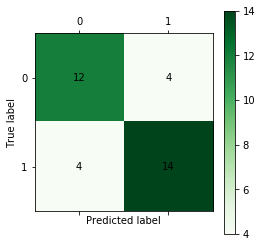

In [131]:
import matplotlib.pyplot as plt #导入作图库
from sklearn.metrics import confusion_matrix #导入混淆矩阵函数
def cm_plot(y, yp):
    cm = confusion_matrix(y, yp) #混淆矩阵
    plt.matshow(cm, cmap=plt.cm.Greens) #画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
    plt.colorbar() #颜色标签
    for x in range(len(cm)): #数据标签
        for y in range(len(cm)):
            plt.annotate(cm[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
    plt.ylabel('True label') #坐标轴标签
    plt.xlabel('Predicted label') #坐标轴标签
    return plt
cm_plot(y,yp).show() #显示混淆矩阵可视化结果

从图可以看出， 检测样本为34个， 预测正确的个数为26个， 预测准确率为76.4%， 预测准确率较低， 是由于神经网络训练时需要较多样本， 而这里是由于训练数据较少造成的。
需要指出的是， 这里的案例比较简单，我们并没有考虑过拟合的问题。事实上，神经网络的拟合能力是很强的,容易出现过拟合现象。跟传统的添加“惩罚项”的做法不同， 目前神经网络
（尤其是深度神经网络）中流行的防止过拟合的方法是随机地让部分神经网络节点休眠,也就是dropout。